In [2]:
import numpy as np
import pandas as pd

In [5]:
filepath= './data/'

In [147]:
covid = pd.read_csv(filepath + '/covid19-US.csv')
flight_jan19 = pd.read_csv(filepath + '/flights-jan19.csv')
flight_jan19 = flight_jan19.drop(flight_jan19.columns[[1,2,3,5,6,8,10]] , axis = 1)
flight_jan19['DAY'] = flight_jan19['FL_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)
flight_jan20 = pd.read_csv(filepath + '/flights-jan20.csv')
flight_jan20 = flight_jan20.drop(flight_jan20.columns[[1,2,3,5,6,8,10]] , axis = 1)
flight_jan20['DAY'] = flight_jan20['FL_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)

In [148]:
flight_jan19.head()

,FL_DATE,ORIGIN_CITY_NAME,DEST_CITY_NAME,FLIGHTS,DAY
0,2019-01-01,"Sarasota/Bradenton, FL","New York, NY",1.0,1
1,2019-01-01,"New York, NY","Washington, DC",1.0,1
2,2019-01-01,"Asheville, NC","Atlanta, GA",1.0,1
3,2019-01-01,"Atlanta, GA","Birmingham, AL",1.0,1
4,2019-01-01,"Birmingham, AL","Atlanta, GA",1.0,1


In [149]:
flight_jan20.head()

,FL_DATE,ORIGIN_CITY_NAME,DEST_CITY_NAME,FLIGHTS,DAY
0,2020-01-01,"Ontario, CA","San Francisco, CA",1.0,1
1,2020-01-01,"Ontario, CA","San Francisco, CA",1.0,1
2,2020-01-01,"Ontario, CA","San Jose, CA",1.0,1
3,2020-01-01,"Ontario, CA","San Jose, CA",1.0,1
4,2020-01-01,"Ontario, CA","San Jose, CA",1.0,1


In [204]:
flight_jan19_origin = flight_jan19.groupby(['ORIGIN_CITY_NAME','DAY']).sum() #['FL_DATE','ORIGIN_CITY_NAME']
flight_jan20_origin = flight_jan20.groupby(['ORIGIN_CITY_NAME','DAY']).sum()
flight_jan19_dest = flight_jan19.groupby(['DEST_CITY_NAME', 'DAY']).sum()
flight_jan20_dest = flight_jan20.groupby(['DEST_CITY_NAME', 'DAY']).sum()
flight_jan19_both = flight_jan19.groupby(['DAY','ORIGIN_CITY_NAME','DEST_CITY_NAME']).sum()
flight_jan20_both = flight_jan20.groupby(['DAY','ORIGIN_CITY_NAME','DEST_CITY_NAME']).sum()

In [205]:
flight_jan19_both.head()

FLIGHTS
DAY ORIGIN_CITY_NAME DEST_CITY_NAME                
1   Aberdeen, SD     Minneapolis, MN            2.0
    Abilene, TX      Dallas/Fort Worth, TX      5.0
    Aguadilla, PR    Fort Lauderdale, FL        2.0
                     New York, NY               2.0
                     Newark, NJ                 1.0

In [235]:
diff_origin = flight_jan19_origin.merge(flight_jan20_origin, left_on = ['ORIGIN_CITY_NAME','DAY'], right_on = ['ORIGIN_CITY_NAME','DAY'])
diff_origin = diff_origin.rename(columns={'FLIGHTS_y':'FLIGHTS_2020', 'FLIGHTS_x':'FLIGHTS_2019'})
diff_origin['DIFFERENCE'] = diff_origin['FLIGHTS_2020'] - diff_origin['FLIGHTS_2019']
diff_dest = flight_jan19_dest.merge(flight_jan20_dest, left_on = ['DEST_CITY_NAME','DAY'], right_on = ['DEST_CITY_NAME','DAY'])
diff_dest = diff_dest.rename(columns={'FLIGHTS_y':'FLIGHTS_2020', 'FLIGHTS_x':'FLIGHTS_2019'})
diff_dest['DIFFERENCE'] = diff_dest['FLIGHTS_2020'] - diff_dest['FLIGHTS_2019']
diff_both = flight_jan19_both.merge(flight_jan20_both, left_on = ['DAY','ORIGIN_CITY_NAME','DEST_CITY_NAME'], right_on = ['DAY','ORIGIN_CITY_NAME','DEST_CITY_NAME'])
diff_both = diff_both.rename(columns={'FLIGHTS_y':'FLIGHTS_2020', 'FLIGHTS_x':'FLIGHTS_2019'})
diff_both['DIFFERENCE'] = diff_both['FLIGHTS_2020'] - diff_both['FLIGHTS_2019']

In [242]:
diff_both = diff_both.reset_index()

In [232]:
print(diff_origin['DIFFERENCE'].max())
print(diff_dest['DIFFERENCE'].max())
print(diff_both['DIFFERENCE'].max())
print(diff_both['DIFFERENCE'].min())

296.0
300.0
22.0
-41.0


In [228]:
diff_daily = diff_both.groupby(['DAY']).sum().reset_index()
diff_daily.head()

,DAY,FLIGHTS_2019,FLIGHTS_2020,DIFFERENCE
0,1,17698.0,17656.0,-42.0
1,2,20024.0,19977.0,-47.0
2,3,19159.0,19961.0,802.0
3,4,19145.0,17499.0,-1646.0
4,5,16509.0,19841.0,3332.0


<BarContainer object of 31 artists>

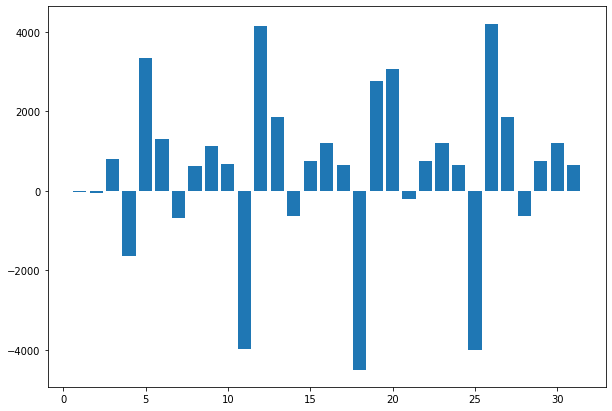

In [231]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
#plt.xticks(rotation=90)
plt.bar(diff_both.groupby(['DAY']).sum().reset_index()['DAY'], diff_both.groupby(['DAY']).sum().reset_index()['DIFFERENCE'])

In [245]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

# data for three-dimensional scattered points
zdata = diff_both['DAY']
xdata = diff_both['ORIGIN_CITY_NAME']
ydata = diff_both['DEST_CITY_NAME']
c = diff_both['DIFFERENCE']
ax.scatter3D(xdata, ydata, zdata, c);

C:\Users\Camille\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

AttributeError: 'Path3DCollection' object has no attribute '_offsets3d'

<Figure size 432x288 with 1 Axes>

In [244]:
diff_both['ORIGIN_CITY_NAME']

0          Aberdeen, SD
1           Abilene, TX
2         Aguadilla, PR
3         Aguadilla, PR
4         Aguadilla, PR
              ...      
124214     Wrangell, AK
124215     Wrangell, AK
124216      Yakutat, AK
124217      Yakutat, AK
124218         Yuma, AZ
Name: ORIGIN_CITY_NAME, Length: 124219, dtype: object